In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

#data files
nfl_stadiums_path = Path("../Data/nfl_stadiums.csv")
nfl_teams_path = Path("../Data/nfl_teams.csv")
spread_values_path = Path("../Data/spreadspoke_scores.csv")

# Read the stadiums, teams, and spread values
nfl_stadiums = pd.read_csv(nfl_stadiums_path, encoding='unicode_escape')
nfl_teams = pd.read_csv(nfl_teams_path, encoding='unicode_escape')
spread_values = pd.read_csv(spread_values_path, encoding='unicode_escape')

# Combine the data into a single DataFrame
team_stadium_merged = pd.merge(nfl_stadiums, nfl_teams,how ='left',on=["stadium_name"])

# Display the data table for preview
team_stadium_merged.head()

,stadium_name,stadium_location_x,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,...,stadium_elevation,stadium_location_y,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367.0,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670.0,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#collect column names within the dataframe 
team_stadium_merged.columns

Index(['stadium_name', 'stadium_location_x', 'stadium_open', 'stadium_close',
       'stadium_type', 'stadium_address', 'stadium_weather_station_zipcode',
       'stadium_weather_type', 'stadium_capacity', 'stadium_surface',
       'stadium_weather_station', 'stadium_weather_station_name',
       'stadium_latitude', 'stadium_longitude', 'stadium_azimuthangle',
       'stadium_elevation', 'stadium_location_y', 'team_name',
       'team_name_short', 'team_id', 'team_id_pfr', 'team_conference',
       'team_division', 'team_conference_pre2002', 'team_division_pre2002'],
      dtype='object')

In [4]:
#rename the columns so that they are easier to read
renamed_team_stadium_merged = team_stadium_merged.rename(columns ={"stadium_name":"Stadium Name", 
                                                                   "stadium_location_x":"Stadium Location",
                                                                   "stadium_open":"Year Opened", 
                                                                   "stadium_close":"Year Closed",
                                                                   "stadium_type": "Stadium Type", 
                                                                   "stadium_address": "Address", 
                                                                   "stadium_weather_station_zipcode":"Weather Station Zipcode",
                                                                   "stadium_weather_type": "Climate", 
                                                                   "stadium_capacity": "Stadium Capacity", 
                                                                   "stadium_surface": "Field Surface Type",
                                                                   "stadium_weather_station": "Weather Station",
                                                                   "stadium_weather_station_name": "Weather Station Name",
                                                                   "stadium_latitude": "Latitude", 
                                                                   "stadium_longitude": "Longitude", 
                                                                   "stadium_azimuthangle": "Dome Angle",
                                                                    "stadium_elevation": "Elevation (ft)", 
                                                                   "stadium_location_y":"Stadium Location2", 
                                                                   "team_name":"Team Name",
                                                                   "team_name_short":"Team Short Name", 
                                                                   "team_id":"Team ID", 
                                                                   "team_id_pfr": "Preferred ID", 
                                                                   "team_conference":"Conference (post 2002)",
                                                                "team_division": "Division (post 2002)", 
                                                                   "team_conference_pre2002": "Divison (pre 2002)", 
                                                                   "team_division_pre2002": "Divison (pre 2002)"})
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002)
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367.0,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670.0,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Export the renamed, merged data into a csv
renamed_team_stadium_merged.to_csv("new_team_stadium_data.csv",index_label="Index")

# Read saved data
renamed_team_stadium_merged = pd.read_csv("new_team_stadium_data.csv", index_col="Index")

#Display sample of data
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Weather Station Zipcode,Climate,Stadium Capacity,Field Surface Type,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,65500,Grass,...,367.0,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,...,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",NaN,indoor,65000,Grass,...,670.0,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",NaN,moderate,75024,Grass,...,492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",NaN,warm,67814,Grass,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Dropping columns that we do not need 
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Zipcode', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station', axis = 1)
renamed_team_stadium_merged = renamed_team_stadium_merged.drop('Weather Station Name', axis = 1)

#Verify the names of the remaining columns
renamed_team_stadium_merged.columns

Index(['Stadium Name', 'Stadium Location', 'Year Opened', 'Year Closed',
       'Stadium Type', 'Address', 'Climate', 'Stadium Capacity',
       'Field Surface Type', 'Latitude', 'Longitude', 'Dome Angle',
       'Elevation (ft)', 'Stadium Location2', 'Team Name', 'Team Short Name',
       'Team ID', 'Preferred ID', 'Conference (post 2002)',
       'Division (post 2002)', 'Divison (pre 2002)', 'Divison (pre 2002).1'],
      dtype='object')

In [7]:
renamed_team_stadium_merged

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Climate,Stadium Capacity,Field Surface Type,Latitude,...,Elevation (ft),Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",cold,65500,Grass,40.484600,...,367.0,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",indoor,72000,FieldTurf,29.416944,...,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",indoor,65000,Grass,36.090750,...,670.0,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",moderate,75024,Grass,48.218800,...,492.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",warm,67814,Grass,30.323889,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49206,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41649,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Calculate the total number of stadiums 

stadium_count = len(renamed_team_stadium_merged["Stadium Name"].unique())
stadium_count

121

In [18]:
#Calculate the total number of teams

team_count = len(renamed_team_stadium_merged["Team ID"].unique())
team_count

33

In [20]:
#Calculate the total number of teams in each conference

conference_count =renamed_team_stadium_merged["Conference (post 2002)"].value_counts()
conference_count

Conference (post 2002)
AFC    22
NFC    22
Name: count, dtype: int64

In [21]:
#Calculate the total number of teams in each conference division

division_count =renamed_team_stadium_merged["Division (post 2002)"].value_counts()
division_count

Division (post 2002)
NFC East     6
AFC West     5
AFC North    4
NFC South    4
NFC North    4
AFC East     4
NFC West     4
AFC South    4
Name: count, dtype: int64

In [9]:
# Calculate the total of stadiums in different climate types 

climate_count = renamed_team_stadium_merged["Climate"].value_counts()
climate_count

Climate
cold        45
warm        33
moderate    32
indoor      22
Name: count, dtype: int64

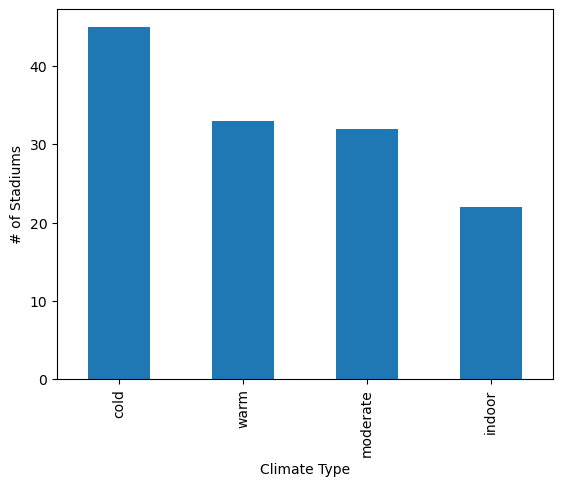

In [10]:
#create a bar chart for showing the total number of stadiums in different climate types
renamed_team_stadium_merged['Climate'].value_counts().plot(kind='bar')
plt.xlabel('Climate Type')
plt.ylabel('# of Stadiums')
plt.show()

In [11]:
# Calculate the total of stadiums with different field types
field_count = renamed_team_stadium_merged["Field Surface Type"].value_counts()
field_count

Field Surface Type
Grass                 83
FieldTurf             41
AstroTurf              5
Hellas Matrix Turf     3
Name: count, dtype: int64

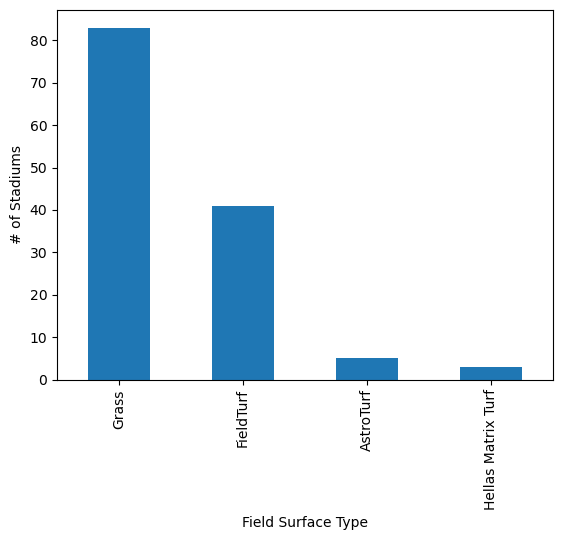

In [12]:
#create a bar chart for showing the total number of stadiums based on their field surface type
renamed_team_stadium_merged['Field Surface Type'].value_counts().plot(kind='bar')
plt.xlabel('Field Surface Type')
plt.ylabel('# of Stadiums')
plt.show()

In [13]:
# Calculate the total for each different type of stadium 
stadium_type = renamed_team_stadium_merged["Stadium Type"].value_counts()
stadium_type

Stadium Type
outdoor        96
indoor         16
retractable    14
Name: count, dtype: int64

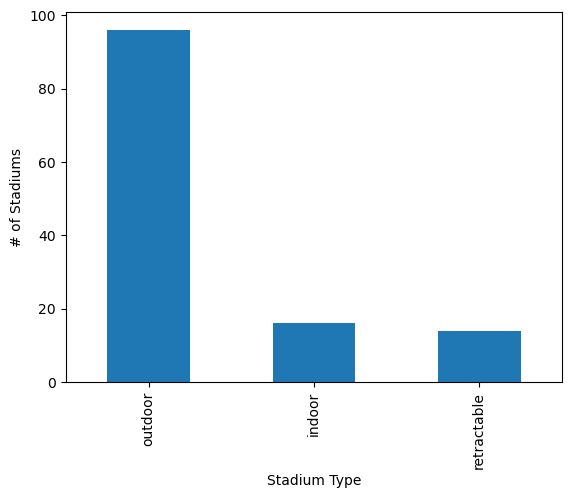

In [14]:
#create a bar chart for showing the different roof types
renamed_team_stadium_merged['Stadium Type'].value_counts().plot(kind='bar')
plt.xlabel('Stadium Type')
plt.ylabel('# of Stadiums')
plt.show()

In [15]:
#stadiums by capacity count

#create the bins
bins = [0, 24999, 49999, 74999, 99999, 125000]

#create labels for the bins 
labels = ["Less than 25K", "25K to 50K", "50K to 75K", "75K to 100K", "100K to 125K"]

#slice the data and place it into the bins 
pd.cut(renamed_team_stadium_merged["Stadium Capacity"], bins, labels=labels)

# Place the data series into a new column inside of the DataFrame
renamed_team_stadium_merged["Stadium Capacity Range"] = pd.cut(renamed_team_stadium_merged["Stadium Capacity"], bins, labels=labels)
renamed_team_stadium_merged.head()

,Stadium Name,Stadium Location,Year Opened,Year Closed,Stadium Type,Address,Climate,Stadium Capacity,Field Surface Type,Latitude,...,Stadium Location2,Team Name,Team Short Name,Team ID,Preferred ID,Conference (post 2002),Division (post 2002),Divison (pre 2002),Divison (pre 2002).1,Stadium Capacity Range
Index,,,,,,,,,,,,,,,,,,,,,
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",cold,65500,Grass,40.484600,...,"Pittsburgh, PA",Pittsburgh Steelers,Steelers,PIT,PIT,AFC,AFC North,AFC,AFC Central,50K to 75K
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",indoor,72000,FieldTurf,29.416944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50K to 75K
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,"3333 Al Davis Way, Las Vegas, NV 89118",indoor,65000,Grass,36.090750,...,"Paradise, NV",Las Vegas Raiders,Raiders,LVR,RAI,AFC,NaN,AFC,AFC West,50K to 75K
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,"Werner-Heisenberg-Allee 25, 80939 München, Ger...",moderate,75024,Grass,48.218800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75K to 100K
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,outdoor,"1 Everbank Field Dr, Jacksonville, FL 32202",warm,67814,Grass,30.323889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50K to 75K


In [16]:
# Create a GroupBy object based upon "Stadium Capacity"
capacity_groups = renamed_team_stadium_merged.groupby("Stadium Capacity Range")

# Find how many rows fall into each bin
print(capacity_groups["Stadium Capacity Range"].count())

Stadium Capacity Range
Less than 25K     4
25K to 50K       14
50K to 75K       83
75K to 100K      35
100K to 125K      2
Name: Stadium Capacity Range, dtype: int64


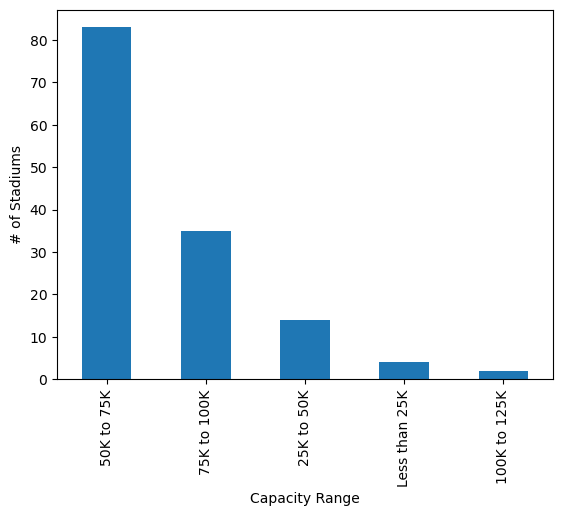

In [17]:
#create a bar chart for showing the stadium capacity ranges
renamed_team_stadium_merged['Stadium Capacity Range'].value_counts().plot(kind='bar')
plt.xlabel('Capacity Range')
plt.ylabel('# of Stadiums')
plt.show()